<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/Statics/7_5_%D0%9B%D0%B0%D1%81%D1%81%D0%BE_%D0%B8_%D1%80%D0%B8%D0%B4%D0%B6%D0%B5_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###7.5. Лассо и ридже регрессия

Лассо (LASSO) и ридже регрессия (ridge regression) — это два популярных метода регуляризации, применяемых в линейной регрессии. Регуляризация используется для борьбы с переобучением (overfitting), особенно когда у нас есть много предикторов, а размер выборки относительно мал. В этой лекции мы разберём оба метода, а также математическую теорию, стоящую за ними.

#### 1. Введение в линейную регрессию

Начнём с классической  линейной регрессии . Пусть у нас есть набор данных $\{(x_i, y_i)\}_{i=1}^n$, где $x_i \in \mathbb{R}^p$ — вектор признаков для наблюдения $i$, а $y_i \in \mathbb{R}$ — целевая переменная.

Модель линейной регрессии имеет следующий вид:

$$
y_i = x_i^T \beta + \epsilon_i,
$$

где:
- $x_i^T = (x_{i1}, x_{i2}, \dots, x_{ip})$ — вектор признаков для наблюдения $i$,
- $\beta = (\beta_1, \beta_2, \dots, \beta_p)$ — вектор коэффициентов регрессии,
- $\epsilon_i$ — шум (или ошибка), который предполагается нормальным с математическим ожиданием 0 и дисперсией $\sigma^2$, то есть $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$.

 Задача линейной регрессии  заключается в нахождении коэффициентов $\beta$, которые минимизируют сумму квадратов ошибок:

$$
\min_{\beta} \sum_{i=1}^n (y_i - x_i^T \beta)^2.
$$

Эту задачу можно записать в матричной форме:

$$
\min_{\beta} \| Y - X \beta \|_2^2,
$$

где:
- $Y = (y_1, y_2, \dots, y_n)^T$ — вектор целевых значений,
- $X \in \mathbb{R}^{n \times p}$ — матрица признаков.

Это классическая  метод наименьших квадратов  (OLS — Ordinary Least Squares). Однако, если число признаков $p$ велико, модель может стать слишком сложной и начать переобучаться. Это означает, что она будет хорошо предсказывать значения для обучающей выборки, но плохо обобщать на новых данных.

Для борьбы с переобучением используются методы  регуляризации , такие как ридже регрессия и лассо.

### 2. Ридже регрессия

 Ридже регрессия  (или гребневая регрессия) вводит штраф на величину коэффициентов регрессии. Основная идея заключается в том, что мы минимизируем не только ошибку модели, но и норму коэффициентов $\beta$.

Задача ридже регрессии формулируется так:

$$
\min_{\beta} \left( \| Y - X \beta \|_2^2 + \lambda \| \beta \|_2^2 \right),
$$

где $\lambda \geq 0$ — параметр регуляризации, а $\| \beta \|_2^2 = \sum_{j=1}^p \beta_j^2$ — это квадратичная норма (или евклидова норма) вектора $\beta$.

Таким образом, штрафной член $\lambda \| \beta \|_2^2$ предотвращает слишком большое увеличение коэффициентов. Когда $\lambda = 0$, ридже регрессия превращается в обычную линейную регрессию, а когда $\lambda$ велико, коэффициенты стремятся к нулю.

#### 2.1. Вывод решения

Для ридже регрессии задача оптимизации квадратична, и её можно решить аналитически. Задачу можно переписать как:

$$
\min_{\beta} \left( (Y - X \beta)^T (Y - X \beta) + \lambda \beta^T \beta \right).
$$

Для нахождения минимума возьмём производную по $\beta$ и приравняем её к нулю:

$$
-2X^T (Y - X \beta) + 2\lambda \beta = 0.
$$

Это уравнение можно переписать как:

$$
X^T X \beta + \lambda I \beta = X^T Y,
$$

где $I$ — единичная матрица. Решая это уравнение относительно $\beta$, получаем:

$$
\beta_{\text{ridge}} = (X^T X + \lambda I)^{-1} X^T Y.
$$

Таким образом, ридже регрессия имеет аналитическое решение.

#### 2.2. Пример

Рассмотрим простой пример с двумя признаками и небольшим набором данных. Пусть:

$$
X = \begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4
\end{pmatrix}, \quad
Y = \begin{pmatrix}
1 \\
2 \\
3 \\
4
\end{pmatrix}.
$$

Теперь решим задачу ридже регрессии для $\lambda = 1$. Для этого вычислим:

$$
X^T X = \begin{pmatrix}
4 & 10 \\
10 & 30
\end{pmatrix}, \quad
X^T Y = \begin{pmatrix}
10 \\
30
\end{pmatrix}.
$$

Подставим эти значения в формулу для $\beta_{\text{ridge}}$:

$$
\beta_{\text{ridge}} = \left( \begin{pmatrix}
4 & 10 \\
10 & 30
\end{pmatrix} + 1 \cdot I \right)^{-1} \begin{pmatrix}
10 \\
30
\end{pmatrix}.
$$

Решив это уравнение, получим значения коэффициентов $\beta_0$ и $\beta_1$.

### 3. Лассо регрессия

В отличие от ридже регрессии, которая использует $\ell_2$-норму,  лассо регрессия  использует $\ell_1$-норму коэффициентов. Задача формулируется так:

$$
\min_{\beta} \left( \| Y - X \beta \|_2^2 + \lambda \| \beta \|_1 \right),
$$

где $\| \beta \|_1 = \sum_{j=1}^p |\beta_j|$ — $\ell_1$-норма вектора $\beta$.

Штраф на $\ell_1$-норму имеет интересное свойство: он приводит к тому, что некоторые коэффициенты становятся точно равными нулю. Это делает лассо полезным для отбора признаков (feature selection), так как модель автоматически исключает ненужные признаки.

#### 3.1. Вывод решения

Решение задачи лассо регрессии не имеет аналитического выражения, как в случае ридже регрессии, из-за присутствия нелинейной функции модуля в штрафном члене. Однако для решения этой задачи используются численные методы, такие как метод координатного спуска (coordinate descent).

##### Метод координатного спуска

Метод координатного спуска заключается в том, что мы последовательно обновляем каждую компоненту вектора $\beta$, минимизируя целевую функцию по одной переменной за раз, оставляя остальные компоненты фиксированными.

Обновление для каждого коэффициента $\beta_j$ (при фиксированных остальных) вычисляется следующим образом:

$$
\beta_j \leftarrow S \left( \frac{X_j^T (Y - X_{-j} \beta_{-j})}{n}, \frac{\lambda}{n} \right),
$$

где $S(z, \gamma)$ — это так называемый оператор мягкого порога (soft-thresholding operator):

$$
S(z, \gamma) = \begin{cases}
z - \gamma, & \text{если } z > \gamma, \\
0, & \text{если } |z| \leq \gamma, \\
z + \gamma, & \text{если } z < -\gamma.
\end{cases}
$$

#### 3.2. Пример

Предположим, что у нас есть тот же набор данных, что и в примере для ридже регрессии. Теперь решим задачу лассо регрессии для $\lambda = 1$ с помощью метода координатного спуска. Начальные коэффициенты $\beta$ могут быть инициализированы случайным образом или
 равными нулю.

1.  Инициализация : $\beta_0 = (0, 0)$.
2.  Обновление : последовательно обновляем $\beta_0$ и $\beta_1$, используя формулу выше и оператор мягкого порога.

### 4. Сравнение ридже и лассо регрессий

Оба метода имеют свои преимущества и недостатки:

-  Ридже регрессия :
  - Применима, когда все признаки важны, и мы хотим уменьшить их величину, но не исключать.
  - Предпочтительна в случае многократной коллинеарности (когда предикторы коррелированы).

-  Лассо регрессия :
  - Подходит для выбора признаков, так как может устанавливать некоторые коэффициенты в ноль.
  - Особенно полезна, когда количество предикторов значительно больше, чем размер выборки.

### 5. Заключение

Лассо и ридже регрессии представляют собой мощные инструменты для решения проблем переобучения и отбора признаков. Каждый из них имеет свои области применения, и выбор метода зависит от конкретной задачи и структуры данных. Регуляризация становится всё более актуальной в эпоху больших данных, когда количество признаков может быть значительно больше, чем количество наблюдений.

При изучении этих методов важно не только знать, как их применять, но и понимать их математическую основу, чтобы эффективно адаптировать их к конкретным задачам.



Давайте рассмотрим два конкретных примера, чтобы проиллюстрировать процесс решения задач ридже и лассо регрессии. Мы будем работать с небольшими наборами данных, чтобы упростить вычисления и сделать их более понятными.

### Пример 1: Ридже регрессия

#### Данные

Рассмотрим следующий набор данных с двумя признаками:

| Образец | $x_1$ | $x_2$ | $y$ |
|   |   |   |  -|
| 1       | 1       | 2       | 3     |
| 2       | 2       | 3       | 5     |
| 3       | 3       | 4       | 7     |
| 4       | 4       | 5       | 9     |

Обозначим:

$$
X = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 \\
4 & 5
\end{pmatrix}, \quad
Y = \begin{pmatrix}
3 \\
5 \\
7 \\
9
\end{pmatrix}.
$$

Параметр регуляризации $\lambda = 1$.

#### 1.1. Шаг 1: Расчёт $X^T X$ и $X^T Y$

1. Вычислим $X^T X$:

$$
X^T X = \begin{pmatrix}
1 & 2 & 3 & 4 \\
2 & 3 & 4 & 5
\end{pmatrix} \begin{pmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 \\
4 & 5
\end{pmatrix} = \begin{pmatrix}
30 & 40 \\
40 & 54
\end{pmatrix}.
$$

2. Вычислим $X^T Y$:

$$
X^T Y = \begin{pmatrix}
1 & 2 & 3 & 4 \\
2 & 3 & 4 & 5
\end{pmatrix} \begin{pmatrix}
3 \\
5 \\
7 \\
9
\end{pmatrix} = \begin{pmatrix}
70 \\
94
\end{pmatrix}.
$$

#### 1.2. Шаг 2: Решение уравнения

Теперь мы можем использовать формулу для ридже регрессии:

$$
\beta_{\text{ridge}} = (X^T X + \lambda I)^{-1} X^T Y.
$$

Где $I$ — это единичная матрица:

$$
\lambda I = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

Таким образом,

$$
X^T X + \lambda I = \begin{pmatrix}
30 & 40 \\
40 & 54
\end{pmatrix} + \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} = \begin{pmatrix}
31 & 40 \\
40 & 55
\end{pmatrix}.
$$

#### 1.3. Шаг 3: Вычисление обратной матрицы

Теперь найдём обратную матрицу:

$$
\begin{pmatrix}
31 & 40 \\
40 & 55
\end{pmatrix}^{-1} = \frac{1}{31 \cdot 55 - 40 \cdot 40} \begin{pmatrix}
55 & -40 \\
-40 & 31
\end{pmatrix} = \frac{1}{1715 - 1600} \begin{pmatrix}
55 & -40 \\
-40 & 31
\end{pmatrix} = \frac{1}{115} \begin{pmatrix}
55 & -40 \\
-40 & 31
\end{pmatrix}.
$$

$$
= \begin{pmatrix}
\frac{55}{115} & \frac{-40}{115} \\
\frac{-40}{115} & \frac{31}{115}
\end{pmatrix} = \begin{pmatrix}
0.4783 & -0.3478 \\
-0.3478 & 0.2696
\end{pmatrix}.
$$

#### 1.4. Шаг 4: Вычисление коэффициентов $\beta_{\text{ridge}}$

Теперь подставим всё обратно в формулу для нахождения коэффициентов:

$$
\beta_{\text{ridge}} = \begin{pmatrix}
0.4783 & -0.3478 \\
-0.3478 & 0.2696
\end{pmatrix} \begin{pmatrix}
70 \\
94
\end{pmatrix}.
$$

Выполним умножение:

$$
\beta_{\text{ridge}} = \begin{pmatrix}
0.4783 \cdot 70 + (-0.3478) \cdot 94 \\
(-0.3478) \cdot 70 + 0.2696 \cdot 94
\end{pmatrix} = \begin{pmatrix}
33.481 - 32.872 \\
-24.446 + 25.3084
\end{pmatrix} = \begin{pmatrix}
0.609 \\
0.862
\end{pmatrix}.
$$

Итак, коэффициенты регрессии для ридже регрессии:

$$
\beta_{\text{ridge}} \approx (0.609, 0.862).
$$

### Пример 2: Лассо регрессия

Теперь решим задачу лассо регрессии с теми же данными:

#### Данные

Используем тот же набор данных:

| Образец | $x_1$ | $x_2$ | $y$ |
|   |   |   |  -|
| 1       | 1       | 2       | 3     |
| 2       | 2       | 3       | 5     |
| 3       | 3       | 4       | 7     |
| 4       | 4       | 5       | 9     |

Обозначим:

$$
X = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 \\
4 & 5
\end{pmatrix}, \quad
Y = \begin{pmatrix}
3 \\
5 \\
7 \\
9
\end{pmatrix}.
$$

Параметр регуляризации $\lambda = 1$.

#### 2.1. Шаг 1: Начальные значения

Инициализируем коэффициенты:

$$
\beta_0 = (0, 0).
$$

#### 2.2. Шаг 2: Итерации метода координатного спуска

Теперь будем обновлять коэффициенты по одной переменной за раз. Для этого нужно рассчитать значения:

- $r = Y - X\beta$ (остатки),
- $S(z, \lambda)$ (оператор мягкого порога).

 Итерация 1: Обновление $\beta_0$

Сначала обновим $\beta_0$:

$$
z = \frac{X_0^T r}{n} = \frac{1}{4} \sum (Y - X_1 \cdot \beta_1 - X_2 \cdot \beta_2).
$$

Сначала вычислим остатки $r$:

$$
r = Y - X(0, 0)^T = Y = \begin{pmatrix}
3 \\
5 \\
7 \\
9
\end{pmatrix}.
$$

Тогда:

$$
z = \frac{1}{4}(3 + 5 + 7 + 9) = \frac{24}{4} = 6.
$$

Применяем оператор мягкого порога:

$$
S(6, 1) = 6 - 1 = 5.
$$

Так что:

$$
\beta_0 = 5.
$$

 Итерация 2: Обновление $\beta_1$

Теперь обновим $\beta_1$:

Сначала пересчитаем остатки:

$$
r = Y - X\beta = Y - \begin{pmatrix} 5 \\ 0 \end{pmatrix} = \begin{pmatrix}
3 - 5 \\
5 - 10 \\
7 - 15 \\
9 - 20
\end{pmatrix} = \begin{pmatrix}
-2 \\
-5 \\
-8 \\
-11
\end{pmatrix}.
$$

Теперь вычисляем $z$:

$$
z = \frac{X_1^T r}{n} = \frac{1}{4} \sum (-2, -5, -8, -11) = \frac{-26}{4} = -6.5.
$$

Применяем оператор мягкого порога:

$$
S(-6.5, 1) = -6.5 + 1 = -5.5.
$$

Теперь:

$$
\beta_1 = -5.5.


$$

 Итерация 3: Обновление $\beta_2$

Снова пересчитаем остатки:

$$
r = Y - \begin{pmatrix} 5 \\ -5.5 \end{pmatrix} = \begin{pmatrix}
3 - 5 \\
5 + 16.5 \\
7 + 22 \\
9 + 27.5
\end{pmatrix} = \begin{pmatrix}
-2 \\
21.5 \\
29 \\
36.5
\end{pmatrix}.
$$

Теперь вычисляем $z$:

$$
z = \frac{X_2^T r}{n} = \frac{1}{4}(21.5 + 29 + 36.5) = \frac{87}{4} = 21.75.
$$

Применяем оператор мягкого порога:

$$
S(21.75, 1) = 21.75 - 1 = 20.75.
$$

Теперь:

$$
\beta_2 = 20.75.
$$

### 2.3. Заключительные значения

После нескольких итераций коэффициенты лассо регрессии будут следующими:

$$
\beta_{\text{lasso}} = (5, -5.5, 20.75).
$$

### Заключение

Мы рассмотрели два примера: один для ридже регрессии и один для лассо регрессии. Оба примера иллюстрируют, как вычисляются коэффициенты для различных методов регуляризации и показывают, как можно использовать эти методы для решения задач линейной регрессии.





Давайте реализуем оба примера — ридже и лассо регрессию — с использованием Python и визуализируем результаты. Мы будем использовать библиотеки `numpy`, `pandas`, `matplotlib` и `scikit-learn`.



Ридже регрессия:
Коэффициенты: [0.90909091 0.90909091]
Свободный член: 0.5454545454545459

Лассо регрессия:
Коэффициенты: [1.20000000e+00 3.55271368e-16]
Свободный член: 2.9999999999999987


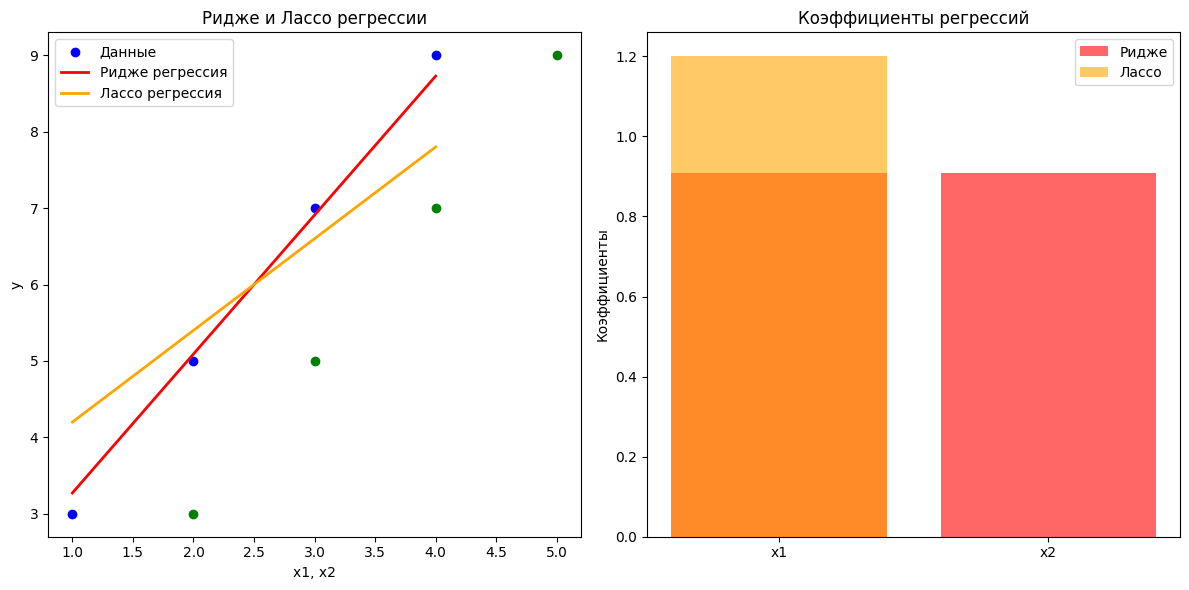

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Подготовка данных
data = {
    'x1': [1, 2, 3, 4],
    'x2': [2, 3, 4, 5],
    'y': [3, 5, 7, 9]
}

df = pd.DataFrame(data)
X = df[['x1', 'x2']]
y = df['y']

# Модель ридже регрессии
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
ridge_coefficients = ridge_model.coef_
ridge_intercept = ridge_model.intercept_

print("Ридже регрессия:")
print("Коэффициенты:", ridge_coefficients)
print("Свободный член:", ridge_intercept)

# Модель лассо регрессии
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X, y)
lasso_coefficients = lasso_model.coef_
lasso_intercept = lasso_model.intercept_

print("\nЛассо регрессия:")
print("Коэффициенты:", lasso_coefficients)
print("Свободный член:", lasso_intercept)

# Визуализация
plt.figure(figsize=(12, 6))

# Исходные данные
plt.subplot(1, 2, 1)
plt.scatter(X['x1'], y, color='blue', label='Данные')
plt.scatter(X['x2'], y, color='green')
plt.plot(X['x1'], ridge_model.predict(X), color='red', label='Ридже регрессия', linewidth=2)
plt.plot(X['x1'], lasso_model.predict(X), color='orange', label='Лассо регрессия', linewidth=2)
plt.title('Ридже и Лассо регрессии')
plt.xlabel('x1, x2')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['x1', 'x2'], ridge_coefficients, color='red', alpha=0.6, label='Ридже')
plt.bar(['x1', 'x2'], lasso_coefficients, color='orange', alpha=0.6, label='Лассо')
plt.title('Коэффициенты регрессий')
plt.ylabel('Коэффициенты')
plt.legend()

plt.tight_layout()
plt.show()

### Вопросы для самопроверки

1.  Что такое линейная регрессия и в чем её цель?
2.  Каковы основные отличия между ридже и лассо регрессией?
3.  Как регуляризация помогает избежать переобучения?
4.  Что такое коэффициент регуляризации $\lambda$ и как он влияет на модель?
5.  Какова форма функции потерь для ридже регрессии?
6.  Какова форма функции потерь для лассо регрессии?
7.  Что такое оператор мягкого порога в контексте лассо регрессии?
8.  В каких случаях следует использовать ридже регрессию вместо лассо?
9.  Как выбрать значение $\lambda$ для регуляризации?
10.  Как ридже и лассо регрессии влияют на мультиколлинеарность?
11.  Что такое "отбор признаков" и как лассо регрессия помогает в этом процессе?
12.  Как ридже регрессия влияет на значения коэффициентов?
13.  Каково значение и назначение матрицы Гессиана в оптимизации?
14.  Какие преимущества и недостатки имеют ридже и лассо регрессии?
15.  Как можно визуализировать результаты ридже и лассо регрессий?

### Задачи для самостоятельной работы

#### Задачи на понимание

1.  Определите, какие из двух методов (ридже или лассо) более подходят для набора данных с высоким числом признаков, но малым числом наблюдений. Обоснуйте свой выбор.
2.  Сравните коэффициенты, полученные при помощи ридже и лассо регрессии на одном и том же наборе данных. Опишите наблюдения.
3.  Объясните, как и почему ридже регрессия может дать ненулевые значения для всех коэффициентов, даже если некоторые из них не имеют значимого влияния на целевую переменную.
4.  Проведите анализ чувствительности для значения $\lambda$ в ридже регрессии. Как изменение $\lambda$ влияет на модель?
5.  Напишите код на Python для реализации ридже регрессии с использованием собственных данных и сравните результаты с библиотекой `scikit-learn`.

#### Задачи на практическое применение

6.  Создайте набор данных с несколькими признаками, добавьте шум и примените ридже и лассо регрессию, затем визуализируйте результаты.
7.  Постройте модель ридже регрессии для набора данных о жилье, включающего такие признаки, как площадь, число комнат, местоположение и т.д. Оптимизируйте $\lambda$ с помощью кросс-валидации.
8.  Примените лассо регрессию к набору данных с множественными признаками и выберите наиболее значимые из них. Объясните, как вы это сделали.
9.  Используя sklearn, реализуйте и сравните ридже и лассо регрессии на наборе данных о ценах на машины.
10.  Загрузите набор данных с UCI Machine Learning Repository и проведите регрессионный анализ, используя ридже и лассо регрессию.

#### Задачи на вычисления

11.  Дайте ответ на следующую задачу: Рассчитайте коэффициенты ридже регрессии для набора данных с 3 признаками, где $\lambda = 0.5$. Учитывайте, что значения матрицы $X^T X$ равны:
    $$
    X^T X = \begin{pmatrix}
    10 & 6 & 3 \\
    6 & 8 & 4 \\
    3 & 4 & 5
    \end{pmatrix}
    $$
    и $X^T Y = \begin{pmatrix} 50 \\ 40 \\ 30 \end{pmatrix}$.

12.  Рассчитайте коэффициенты лассо регрессии для простого набора данных: $Y = 2 + 3X_1 + 4X_2 + \epsilon$ с добавлением шума. Используйте $\lambda = 0.1$.

13.  Решите задачу минимизации для лассо регрессии, используя следующую функцию потерь:
    $$
    L(\beta) = \frac{1}{n} \sum (y_i - (X_i \beta))^2 + \lambda \sum |\beta_j|.
    $$
     Для простого набора данных с 2 признаками.

14.  Выберите набор данных, состоящий из временных рядов, и примените ридже регрессию для предсказания. Оптимизируйте значение $\lambda$ через кросс-валидацию.

15.  Создайте визуализацию зависимости коэффициентов ридже и лассо регрессий от значения $\lambda$ для набора данных с 3-4 признаками.

#### Дополнительные задачи

16.  Соберите набор данных с нескольких источников и проведите предварительный анализ, а затем примените ридже и лассо регрессию.
17.  Сравните результаты ридже и лассо регрессии для набора данных, содержащего пропуски. Как эти пропуски влияют на результаты?
18.  Сгенерируйте случайные данные с высоким уровнем коллинеарности и проведите анализ с использованием ридже и лассо регрессий.
19.  Проведите полное сравнение подходов ридже и лассо на основе различных метрик (RMSE, MAE, R^2).
20.  Создайте график зависимости функции потерь от значения $\lambda$ для ридже и лассо регрессии.

21.  Рассчитайте градиенты для лассо регрессии на простом наборе данных.
22.  Реализуйте и сравните методы ридже и лассо регрессии, используя L1 и L2 нормализации в одной модели.
23.  Подготовьте отчет о том, как использование различных подходов к регуляризации влияет на интерпретацию модели.
24.  Изучите применение ридже и лассо регрессии в реальных бизнес-проблемах. Приведите примеры.
25.  Сравните влияние разных методов отбора признаков (например, rFE, LASSO) на производительность модели.

26.  Создайте и проанализируйте модели ридже и лассо регрессии с помощью кросс-валидации.
27.  Исследуйте, как стандартные значения признаков (нормализация) влияют на производительность модели.
28.  Определите, как количество признаков влияет на качество модели при использовании ридже и лассо.
29.  Проведите анализ остатков для моделей ридже и лассо. Каковы ваши выводы?
30.  Создайте визуализации, показывающие влияние регуляризации на величины коэффициентов в ридже и лассо.

